In [17]:
# Healthcare Claims Data Analysis
# Stony Brook University Hospital - May 2024 Claims Data

# ============================================================================
# PART 1: DATA LOADING AND EXPLORATION
# ============================================================================

# Install and import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [19]:
# ----------------------------------------------------------------------------
# Load the three CSV files
# ----------------------------------------------------------------------------
"""
This block loads the three relational claims files:
- HEADER: One row per claim with provider and payer info
- LINE: Multiple rows per claim for each service/procedure
- CODE: Multiple rows per claim for each diagnosis code
"""

# Load data files (adjust file paths if needed)
df_header = pd.read_csv('STONYBRK_20240531_HEADER.csv', low_memory=False)
df_line = pd.read_csv('STONYBRK_20240531_LINE.csv', low_memory=False)
df_code = pd.read_csv('STONYBRK_20240531_CODE.csv', low_memory=False)

print("✓ Data files loaded successfully!")
print(f"  - HEADER rows: {len(df_header):,}")
print(f"  - LINE rows: {len(df_line):,}")
print(f"  - CODE rows: {len(df_code):,}")

✓ Data files loaded successfully!
  - HEADER rows: 388
  - LINE rows: 520
  - CODE rows: 1,536


In [20]:
# ----------------------------------------------------------------------------
# Explore HEADER file structure
# ----------------------------------------------------------------------------
"""
Display basic information about the HEADER file including:
- Shape, column names, data types
- First few rows
- Missing values
- Basic statistics
"""

print("\n" + "="*80)
print("HEADER FILE EXPLORATION")
print("="*80)

print(f"\nShape: {df_header.shape[0]} rows × {df_header.shape[1]} columns")
print(f"\nColumn Names:\n{df_header.columns.tolist()}")

print("\n--- First 5 Rows ---")
display(df_header.head())

print("\n--- Data Types ---")
print(df_header.dtypes)

print("\n--- Missing Values ---")
missing_header = df_header.isnull().sum()
print(missing_header[missing_header > 0])

print("\n--- Numeric Columns Statistics ---")
display(df_header.describe())



HEADER FILE EXPLORATION

Shape: 388 rows × 43 columns

Column Names:
['ClientId', 'ProspectiveClaimId', 'ClaimType', 'BillingProviderNPI', 'BillingProvFirstName', 'BillingProvLastName', 'AttendingProviderNPI', 'AttendingProvFirstName', 'AttendingProvLastName', 'RenderingProviderNPI', 'RenderingProvFirstName', 'RenderingProvLastName', 'ReferringProviderNPI', 'ReferringProvFirstName', 'ReferringProvLastName', 'OperatingProviderNPI', 'OperatingProvFirstName', 'OperatingProvLastName', 'ServiceFromDate', 'ServiceToDate', 'PrimaryPayerName', 'PrimaryPayerCode', 'PrimaryPayerCFI', 'SecondaryPayer', 'SecondaryPayerCode', 'SecondaryPayerCFI', 'TertianaryPayer', 'TertianaryPayerCode', 'TertianaryPayerCFI', 'DRG', 'AdmitType', 'DischargeStatus', 'AdmitDx', 'Facility_Location', 'CoderId', 'CoderName', 'PlaceOfService', 'WorkQueName', 'WorkQueId', 'ClinicalTrialIdentifier', 'PriorAuthorizationNo', 'InvestDeviceExmptNo', 'ReferralNo']

--- First 5 Rows ---


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN



--- Data Types ---
ClientId                     int64
ProspectiveClaimId           int64
ClaimType                   object
BillingProviderNPI           int64
BillingProvFirstName        object
BillingProvLastName        float64
AttendingProviderNPI       float64
AttendingProvFirstName      object
AttendingProvLastName       object
RenderingProviderNPI         int64
RenderingProvFirstName      object
RenderingProvLastName       object
ReferringProviderNPI       float64
ReferringProvFirstName      object
ReferringProvLastName       object
OperatingProviderNPI       float64
OperatingProvFirstName     float64
OperatingProvLastName      float64
ServiceFromDate             object
ServiceToDate               object
PrimaryPayerName            object
PrimaryPayerCode             int64
PrimaryPayerCFI             object
SecondaryPayer             float64
SecondaryPayerCode         float64
SecondaryPayerCFI          float64
TertianaryPayer            float64
TertianaryPayerCode        float64


,ClientId,ProspectiveClaimId,BillingProviderNPI,BillingProvLastName,AttendingProviderNPI,RenderingProviderNPI,ReferringProviderNPI,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,...,AdmitType,DischargeStatus,AdmitDx,CoderId,PlaceOfService,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
count,388.0,3.880000e+02,3.880000e+02,0.0,2.000000e+00,3.880000e+02,8.700000e+01,0.0,0.0,0.0,...,0.0,0.0,0.0,388.0,388.000000,388.000000,388.0,0.0,0.0,0.0
mean,49.0,3.670543e+07,1.462851e+09,NaN,1.472878e+09,1.565732e+09,1.538206e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,17.664948,316.175258,0.0,NaN,NaN,NaN
std,0.0,3.562317e+05,3.247005e+08,NaN,6.069869e+08,2.863497e+08,2.676761e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,4.798913,0.380678,0.0,NaN,NaN,NaN
min,49.0,3.521699e+07,1.063469e+09,NaN,1.043673e+09,1.003467e+09,1.003264e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,11.000000,316.000000,0.0,NaN,NaN,NaN
25%,49.0,3.669166e+07,1.154376e+09,NaN,1.258275e+09,1.295152e+09,1.391558e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,11.000000,316.000000,0.0,NaN,NaN,NaN
50%,49.0,3.683352e+07,1.437106e+09,NaN,1.472878e+09,1.467003e+09,1.518953e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,21.000000,316.000000,0.0,NaN,NaN,NaN
75%,49.0,3.688171e+07,1.821036e+09,NaN,1.687480e+09,1.902082e+09,1.780521e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,21.000000,316.000000,0.0,NaN,NaN,NaN
max,49.0,3.700149e+07,1.982659e+09,NaN,1.902082e+09,1.992124e+09,1.992068e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,23.000000,317.000000,0.0,NaN,NaN,NaN


In [21]:
# ----------------------------------------------------------------------------
# Explore LINE file structure
# ----------------------------------------------------------------------------
"""
Display basic information about the LINE file which contains
service line details (procedures, charges, units)
"""

print("\n" + "="*80)
print("LINE FILE EXPLORATION")
print("="*80)

print(f"\nShape: {df_line.shape[0]} rows × {df_line.shape[1]} columns")
print(f"\nColumn Names:\n{df_line.columns.tolist()}")

print("\n--- First 5 Rows ---")
display(df_line.head())

print("\n--- Data Types ---")
print(df_line.dtypes)

print("\n--- Missing Values ---")
missing_line = df_line.isnull().sum()
print(missing_line[missing_line > 0])

print("\n--- Numeric Columns Statistics ---")
display(df_line.describe())



LINE FILE EXPLORATION

Shape: 520 rows × 28 columns

Column Names:
['ClientId', 'ProspectiveClaimId', 'LinePos', 'RevCode', 'HCPCS', 'Modifier1', 'Modifier2', 'Modifier3', 'Modifier4', 'DxMapDelim', 'DxMap1', 'DxMap2', 'DxMap3', 'DxMap4', 'ServiceDate', 'ServiceThruDate', 'Units', 'Charges', 'PlaceOfService', 'NDC', 'NDCUnits', 'NDCRx', 'NDCUnitQualifier', 'RenderingProvNPI', 'CoderId', 'CodeName', 'ClientProcedureCode', 'ClientProcedureName']

--- First 5 Rows ---


,ClientId,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,...,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",...,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"



--- Data Types ---
ClientId                 int64
ProspectiveClaimId       int64
LinePos                  int64
RevCode                float64
HCPCS                   object
Modifier1               object
Modifier2               object
Modifier3              float64
Modifier4              float64
DxMapDelim              object
DxMap1                   int64
DxMap2                 float64
DxMap3                 float64
DxMap4                 float64
ServiceDate             object
ServiceThruDate         object
Units                    int64
Charges                  int64
PlaceOfService           int64
NDC                    float64
NDCUnits               float64
NDCRx                  float64
NDCUnitQualifier       float64
RenderingProvNPI       float64
CoderId                  int64
CodeName                object
ClientProcedureCode     object
ClientProcedureName     object
dtype: object

--- Missing Values ---
RevCode             520
Modifier1           273
Modifier2           482
Mo

,ClientId,ProspectiveClaimId,LinePos,RevCode,Modifier3,Modifier4,DxMap1,DxMap2,DxMap3,DxMap4,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId
count,520.0,5.200000e+02,520.000000,0.0,0.0,0.0,520.000000,340.000000,232.000000,167.000000,520.0,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,520.0
mean,49.0,3.672637e+07,1.401923,NaN,NaN,NaN,1.150000,2.082353,3.064655,4.017964,1.0,455.521154,16.648077,NaN,NaN,NaN,NaN,NaN,4.0
std,0.0,3.278837e+05,0.861282,NaN,NaN,NaN,0.576181,0.433461,0.446391,0.445500,0.0,408.596021,5.041370,NaN,NaN,NaN,NaN,NaN,0.0
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
25%,49.0,3.669946e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,255.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
50%,49.0,3.683102e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,330.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
75%,49.0,3.688171e+07,2.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
max,49.0,3.700149e+07,7.000000,NaN,NaN,NaN,6.000000,6.000000,7.000000,8.000000,1.0,2580.000000,23.000000,NaN,NaN,NaN,NaN,NaN,4.0


In [22]:
# ----------------------------------------------------------------------------
# Explore CODE file structure
# ----------------------------------------------------------------------------
"""
Display basic information about the CODE file which contains
diagnosis codes (ICD-10) linked to each claim
"""

print("\n" + "="*80)
print("CODE FILE EXPLORATION")
print("="*80)

print(f"\nShape: {df_code.shape[0]} rows × {df_code.shape[1]} columns")
print(f"\nColumn Names:\n{df_code.columns.tolist()}")

print("\n--- First 5 Rows ---")
display(df_code.head())

print("\n--- Data Types ---")
print(df_code.dtypes)

print("\n--- Missing Values ---")
missing_code = df_code.isnull().sum()
print(missing_code[missing_code > 0])

print("\n--- Basic Statistics ---")
display(df_code.describe())



CODE FILE EXPLORATION

Shape: 1536 rows × 9 columns

Column Names:
['ClientId', 'ProspectiveClaimId', 'CodeQualifier', 'CodePos', 'CodeValue', 'CodeFromDate', 'CodeToDate', 'CodeAmnt', 'POAInd']

--- First 5 Rows ---


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN



--- Data Types ---
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd                float64
dtype: object

--- Missing Values ---
CodeFromDate    1536
CodeToDate      1536
CodeAmnt        1536
POAInd          1536
dtype: int64

--- Basic Statistics ---


,ClientId,ProspectiveClaimId,CodePos,CodeFromDate,CodeToDate,CodeAmnt,POAInd
count,1536.0,1.536000e+03,1536.000000,0.0,0.0,0.0,0.0
mean,49.0,3.655962e+07,3.666016,NaN,NaN,NaN,NaN
std,0.0,4.706310e+05,2.735657,NaN,NaN,NaN,NaN
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,NaN
25%,49.0,3.646555e+07,1.000000,NaN,NaN,NaN,NaN
50%,49.0,3.675250e+07,3.000000,NaN,NaN,NaN,NaN
75%,49.0,3.686023e+07,5.000000,NaN,NaN,NaN,NaN
max,49.0,3.700149e+07,12.000000,NaN,NaN,NaN,NaN


In [23]:
# ----------------------------------------------------------------------------
# Explore CODE file structure
# ----------------------------------------------------------------------------
"""
Display basic information about the CODE file which contains
diagnosis codes (ICD-10) linked to each claim
"""

print("\n" + "="*80)
print("CODE FILE EXPLORATION")
print("="*80)

print(f"\nShape: {df_code.shape[0]} rows × {df_code.shape[1]} columns")
print(f"\nColumn Names:\n{df_code.columns.tolist()}")

print("\n--- First 5 Rows ---")
display(df_code.head())

print("\n--- Data Types ---")
print(df_code.dtypes)

print("\n--- Missing Values ---")
missing_code = df_code.isnull().sum()
print(missing_code[missing_code > 0])

print("\n--- Basic Statistics ---")
display(df_code.describe())



CODE FILE EXPLORATION

Shape: 1536 rows × 9 columns

Column Names:
['ClientId', 'ProspectiveClaimId', 'CodeQualifier', 'CodePos', 'CodeValue', 'CodeFromDate', 'CodeToDate', 'CodeAmnt', 'POAInd']

--- First 5 Rows ---


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN



--- Data Types ---
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd                float64
dtype: object

--- Missing Values ---
CodeFromDate    1536
CodeToDate      1536
CodeAmnt        1536
POAInd          1536
dtype: int64

--- Basic Statistics ---


,ClientId,ProspectiveClaimId,CodePos,CodeFromDate,CodeToDate,CodeAmnt,POAInd
count,1536.0,1.536000e+03,1536.000000,0.0,0.0,0.0,0.0
mean,49.0,3.655962e+07,3.666016,NaN,NaN,NaN,NaN
std,0.0,4.706310e+05,2.735657,NaN,NaN,NaN,NaN
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,NaN
25%,49.0,3.646555e+07,1.000000,NaN,NaN,NaN,NaN
50%,49.0,3.675250e+07,3.000000,NaN,NaN,NaN,NaN
75%,49.0,3.686023e+07,5.000000,NaN,NaN,NaN,NaN
max,49.0,3.700149e+07,12.000000,NaN,NaN,NaN,NaN


In [24]:
# ----------------------------------------------------------------------------
# Key Dataset Observations
# ----------------------------------------------------------------------------

print("\n" + "="*80)
print("KEY DATASET OBSERVATIONS")
print("="*80)

# 1. Unique claims
unique_claims = df_header['ProspectiveClaimId'].nunique()
print(f"\n1. Unique Claims: {unique_claims:,}")

# 2. Date range (convert ServiceDate to datetime)
df_line['ServiceDate'] = pd.to_datetime(df_line['ServiceDate'], errors='coerce')
date_range = (df_line['ServiceDate'].min(), df_line['ServiceDate'].max())
print(f"\n2. Date Range: {date_range[0].strftime('%Y-%m-%d')} to {date_range[1].strftime('%Y-%m-%d')}")

# 3. Average service lines per claim
lines_per_claim = df_line.groupby('ProspectiveClaimId').size()
avg_lines = lines_per_claim.mean()
print(f"\n3. Average Service Lines per Claim: {avg_lines:.2f}")
print(f"   - Min: {lines_per_claim.min()}")
print(f"   - Max: {lines_per_claim.max()}")
print(f"   - Median: {lines_per_claim.median():.1f}")

# 4. Average diagnosis codes per claim
codes_per_claim = df_code.groupby('ProspectiveClaimId').size()
avg_codes = codes_per_claim.mean()
print(f"\n4. Average Diagnosis Codes per Claim: {avg_codes:.2f}")
print(f"   - Min: {codes_per_claim.min()}")
print(f"   - Max: {codes_per_claim.max()}")
print(f"   - Median: {codes_per_claim.median():.1f}")



KEY DATASET OBSERVATIONS

1. Unique Claims: 388

2. Date Range: 2023-09-25 to 2024-05-29

3. Average Service Lines per Claim: 1.34
   - Min: 1
   - Max: 7
   - Median: 1.0

4. Average Diagnosis Codes per Claim: 3.96
   - Min: 1
   - Max: 12
   - Median: 3.0



QUESTION 1: TOP 5 BILLING PROVIDERS BY CLAIM COUNT

Total Unique Claims in Dataset: 388

Top 5 Providers (First Name + NPI):
               BillingProvFirstName BillingProviderNPI  ClaimCount
                      SB INTERNISTS         1821035601         152
             SB SURGICAL ASSOCIATES         1063468536          81
   NEW YORK SPINE AND BRAIN SURGERY         1154376309          69
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY         1538114723          40
          SB PSYCHIATRIC ASSOCIATES         1437105905          36


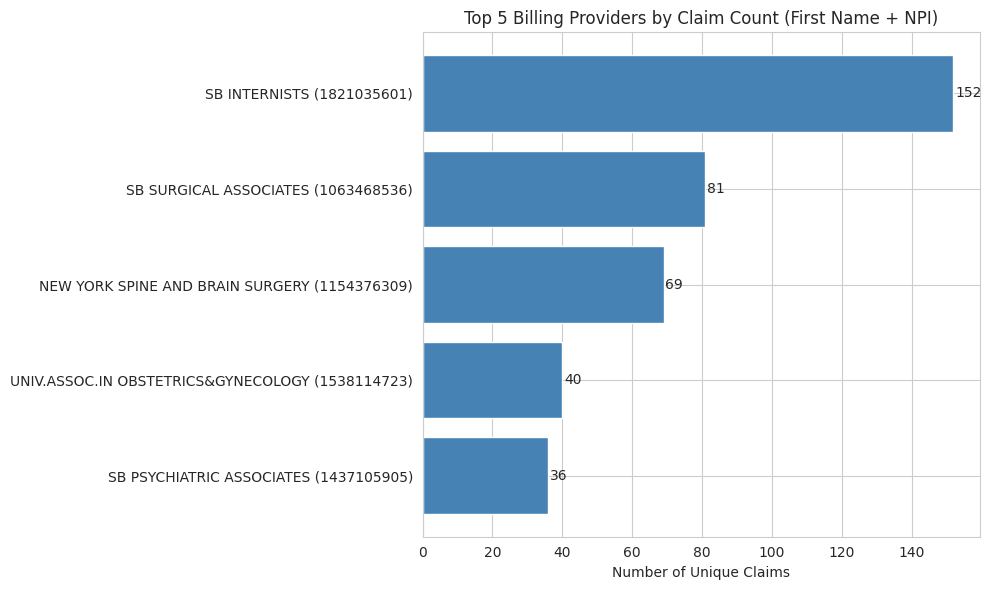

In [54]:
# ============================================================================
# PART 2: RELATIONAL DATA ANALYSIS
# ============================================================================
# ----------------------------------------------------------------------------
# QUESTION 1: Provider Analysis - Top 5 Billing Providers
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("QUESTION 1: TOP 5 BILLING PROVIDERS BY CLAIM COUNT")
print("="*80)

provider_claims = (
    df_header.groupby(['BillingProvFirstName', 'BillingProviderNPI'])
    .agg(ClaimCount=('ProspectiveClaimId', 'nunique'))
    .reset_index()
)

# Calculate total unique claims
total_unique_claims = df_header['ProspectiveClaimId'].nunique()
print(f"\nTotal Unique Claims in Dataset: {total_unique_claims:,}")

# If names are almost all '(Unknown)', fall back to NPI-only grouping to avoid meaningless "(Unknown)" rows
unknown_name_ratio = (provider_claims['BillingProvFirstName'] == '(Unknown)').mean()

if unknown_name_ratio > 0.5:
    provider_claims = (
        df_header.groupby(['BillingProviderNPI'])
        .agg(ClaimCount=('ProspectiveClaimId', 'nunique'))
        .reset_index()
        .rename(columns={'BillingProviderNPI': 'BillingProviderLabel'})
    )
    provider_claims['BillingProviderLabel'] = provider_claims['BillingProviderLabel'].astype(str)
    top_providers = provider_claims.nlargest(5, 'ClaimCount')
    print("\nTop Providers (grouped by NPI because names are missing):")
    print(top_providers.to_string(index=False))

    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(top_providers['BillingProviderLabel'], top_providers['ClaimCount'])
    plt.gca().invert_yaxis()
    plt.xlabel('Number of Unique Claims')
    plt.title('Top Billing Providers by Claim Count (NPI)')
    for i, v in enumerate(top_providers['ClaimCount']):
        plt.text(v + 0.5, i, str(int(v)), va='center')
    plt.tight_layout()
    plt.show()
else:
    top_providers = provider_claims.nlargest(5, 'ClaimCount')
    print("\nTop 5 Providers (First Name + NPI):")
    print(top_providers.to_string(index=False))

    # Plot
    plt.figure(figsize=(10,6))
    labels = top_providers.apply(lambda r: f"{r['BillingProvFirstName']} ({r['BillingProviderNPI']})", axis=1)
    plt.barh(labels, top_providers['ClaimCount'], color='steelblue')
    plt.gca().invert_yaxis()
    plt.xlabel('Number of Unique Claims')
    plt.title('Top 5 Billing Providers by Claim Count (First Name + NPI)')
    for i, v in enumerate(top_providers['ClaimCount']):
        plt.text(v + 0.5, i, str(int(v)), va='center')
    plt.tight_layout()
    plt.show()


QUESTION 2: PAYER MIX ANALYSIS

Top 5 Payers:
          PrimaryPayerName  ClaimCount  Percentage
                  MEDICARE         242       62.37
           HEALTHFIRST FFS          46       11.86
FIDELIS/BETTER HEALTH PLAN          26        6.70
              HIP MEDICAID          17        4.38
     HEALTHFIRST CAPITATED          10        2.58


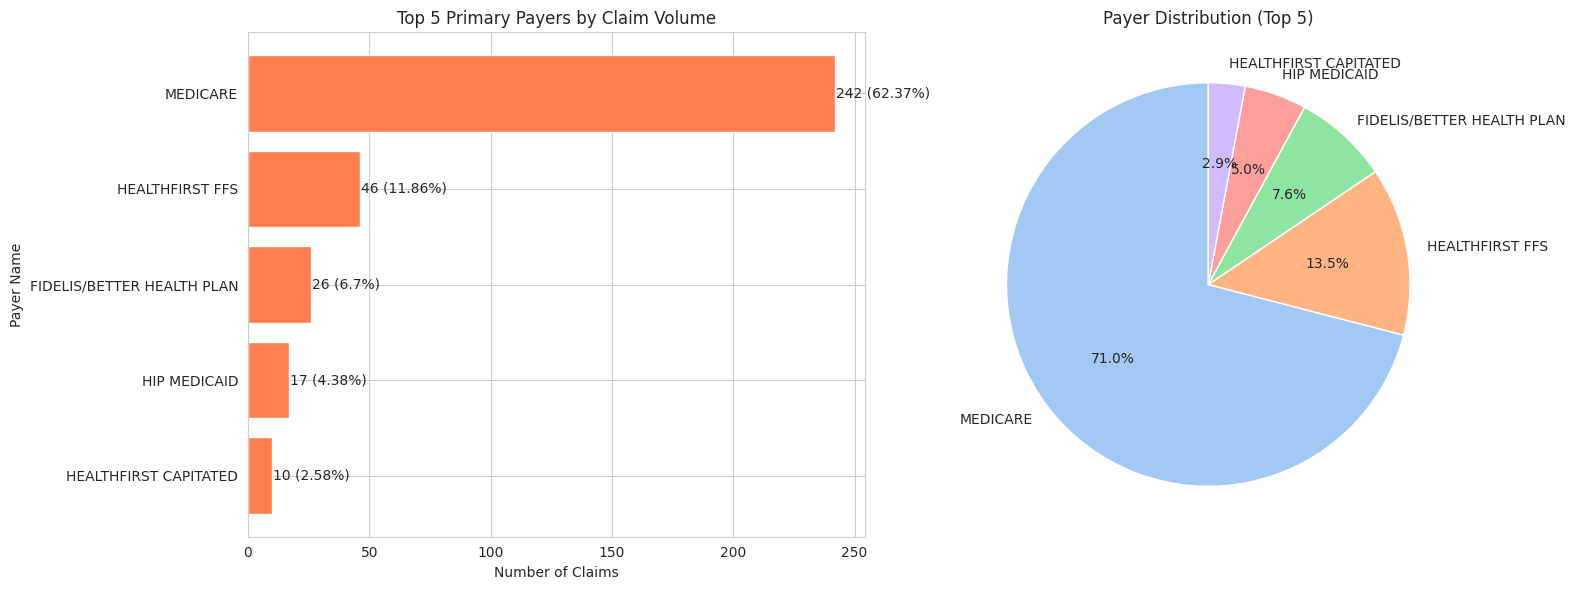

In [56]:
# ----------------------------------------------------------------------------
# QUESTION 2: Payer Mix Analysis
# ----------------------------------------------------------------------------
"""
Analyze the distribution of claims across different insurance payers.
Understanding payer mix is critical for revenue cycle management.
"""

print("\n" + "="*80)
print("QUESTION 2: PAYER MIX ANALYSIS")
print("="*80)

# Count claims by payer
payer_claims = df_header.groupby('PrimaryPayerName').size().reset_index(name='ClaimCount')
payer_claims['Percentage'] = (payer_claims['ClaimCount'] / payer_claims['ClaimCount'].sum() * 100).round(2)
payer_claims = payer_claims.sort_values('ClaimCount', ascending=False)

top_5_payers = payer_claims.head(5)

print("\nTop 5 Payers:")
print(top_5_payers.to_string(index=False))

# Visualization - Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
ax1.barh(top_5_payers['PrimaryPayerName'], top_5_payers['ClaimCount'], color='coral')
ax1.set_xlabel('Number of Claims')
ax1.set_ylabel('Payer Name')
ax1.set_title('Top 5 Primary Payers by Claim Volume')
ax1.invert_yaxis()
for i, (count, pct) in enumerate(zip(top_5_payers['ClaimCount'], top_5_payers['Percentage'])):
    ax1.text(count + 0.5, i, f'{count} ({pct}%)', va='center')

# Pie chart
ax2.pie(top_5_payers['ClaimCount'], labels=top_5_payers['PrimaryPayerName'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax2.set_title('Payer Distribution (Top 5)')

plt.tight_layout()
plt.show()


QUESTION 3: TOP 10 MOST COMMON DIAGNOSIS CODES

Top 10 Diagnosis Codes:
ICD10_Code  Frequency
    J96.01         62
       I10         49
     E78.5         49
     G93.5         34
     D64.9         29
    I25.10         27
     I61.9         26
    I48.91         24
     I60.8         24
     I50.9         22

Note: Look up these codes at icd10data.com for detailed descriptions


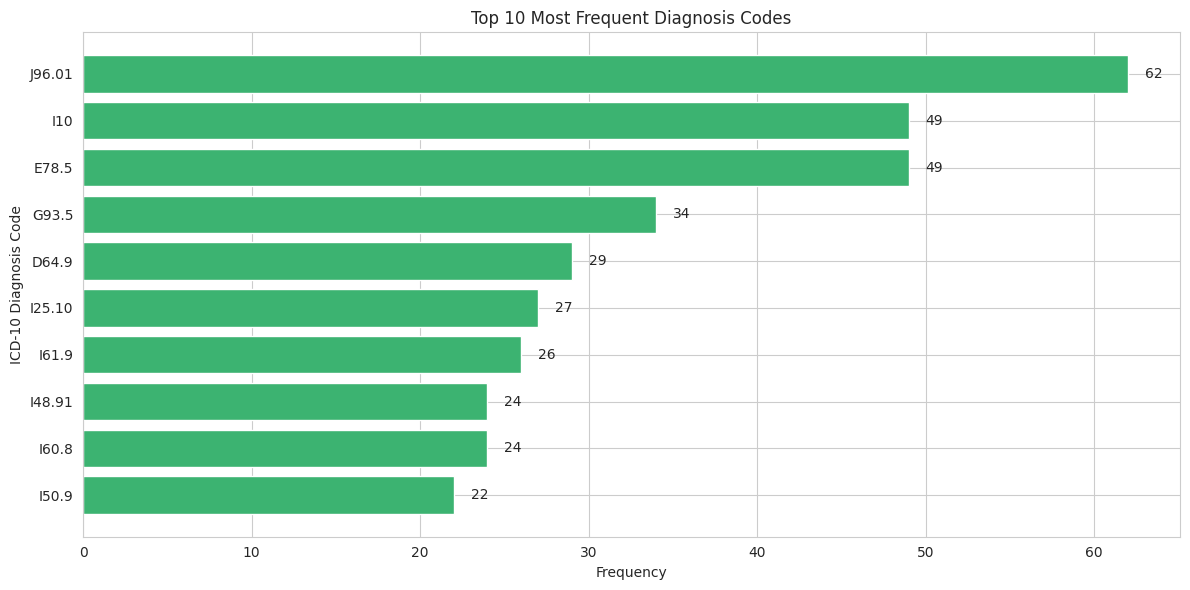

In [32]:
# ----------------------------------------------------------------------------
# QUESTION 3: Common Diagnoses
# ----------------------------------------------------------------------------
"""
Identify the most frequently appearing diagnosis codes.
This reveals the most common conditions treated at the hospital.
"""

print("\n" + "="*80)
print("QUESTION 3: TOP 10 MOST COMMON DIAGNOSIS CODES")
print("="*80)

# Count diagnosis codes
diagnosis_counts = df_code['CodeValue'].value_counts().head(10).reset_index()
diagnosis_counts.columns = ['ICD10_Code', 'Frequency']

print("\nTop 10 Diagnosis Codes:")
print(diagnosis_counts.to_string(index=False))
print("\nNote: Look up these codes at icd10data.com for detailed descriptions")

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(diagnosis_counts['ICD10_Code'], diagnosis_counts['Frequency'], color='mediumseagreen')
plt.xlabel('Frequency')
plt.ylabel('ICD-10 Diagnosis Code')
plt.title('Top 10 Most Frequent Diagnosis Codes')
plt.gca().invert_yaxis()
for i, v in enumerate(diagnosis_counts['Frequency']):
    plt.text(v + 1, i, str(v), va='center')
plt.tight_layout()
plt.show()



QUESTION 4: TOP 10 MOST COMMON PROCEDURE CODES

Top 10 Procedure Codes:
HCPCS_Code                                                           ClientProcedureName  Frequency
     99291                                             CRITICAL CARE, INITIAL FIRST HOUR         68
     99233                SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3         48
     99213    OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,EXAM,LOW COMPLEXITY DECISION         39
     99223               INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3         33
     99222                INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF A PATIENT;LEVEL 2         32
     99232      SUBS.HOSP.CARE EXPAND.PROBLEM FOCUSED HX.,EXAM MODERATE COMPLEX.DECISION         21
     90833               PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATIENT AND/OR FAMILY         16
     99204                    OFFICE/OUTPT VISIT FOR  THE E & M OF A NEW PATIENT;LEVEL 4         14
     99214 OFFICE/OUTPT VIS

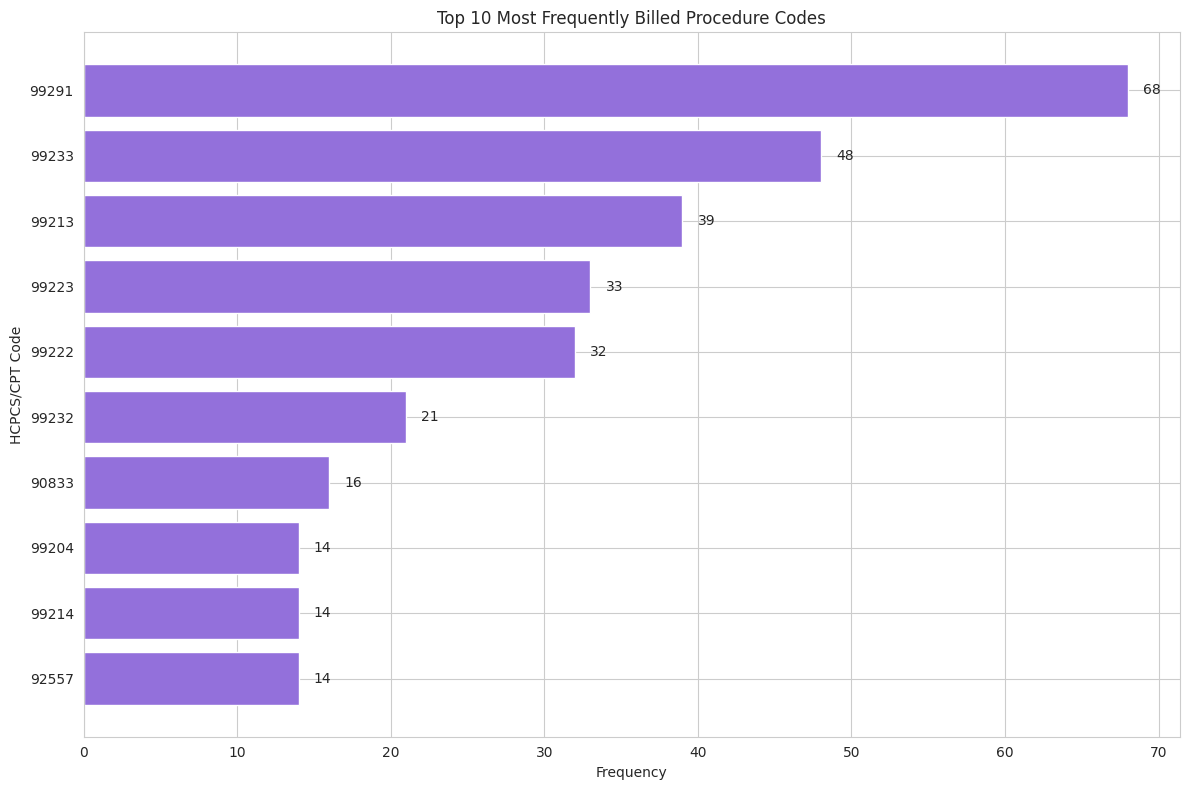

In [33]:
# ----------------------------------------------------------------------------
# QUESTION 4: Common Procedures
# ----------------------------------------------------------------------------
"""
Identify the most frequently billed procedure codes (CPT/HCPCS).
This shows the most common services provided.
"""

print("\n" + "="*80)
print("QUESTION 4: TOP 10 MOST COMMON PROCEDURE CODES")
print("="*80)

# Count procedure codes
procedure_counts = df_line['HCPCS'].value_counts().head(10).reset_index()
procedure_counts.columns = ['HCPCS_Code', 'Frequency']

# Add description if available (from ClientProcedureName column)
procedure_with_desc = df_line.groupby('HCPCS')['ClientProcedureName'].first().reset_index()
procedure_counts = procedure_counts.merge(procedure_with_desc, left_on='HCPCS_Code', right_on='HCPCS', how='left')
procedure_counts = procedure_counts[['HCPCS_Code', 'ClientProcedureName', 'Frequency']]

print("\nTop 10 Procedure Codes:")
pd.set_option('display.max_colwidth', 60)
print(procedure_counts.to_string(index=False))
pd.reset_option('display.max_colwidth')

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(procedure_counts['HCPCS_Code'].astype(str), procedure_counts['Frequency'], color='mediumpurple')
plt.xlabel('Frequency')
plt.ylabel('HCPCS/CPT Code')
plt.title('Top 10 Most Frequently Billed Procedure Codes')
plt.gca().invert_yaxis()
for i, v in enumerate(procedure_counts['Frequency']):
    plt.text(v + 1, i, str(v), va='center')
plt.tight_layout()
plt.show()


QUESTION 5: SERVICE LOCATION ANALYSIS

Claims by Place of Service:
 PlaceOfService  ClaimCount  Percentage
             21         254       48.85
             11         230       44.23
             22          35        6.73
             23           1        0.19

✓ Inpatient Hospital (POS=21): 254 claims
✓ Doctor's Office (POS=11): 230 claims


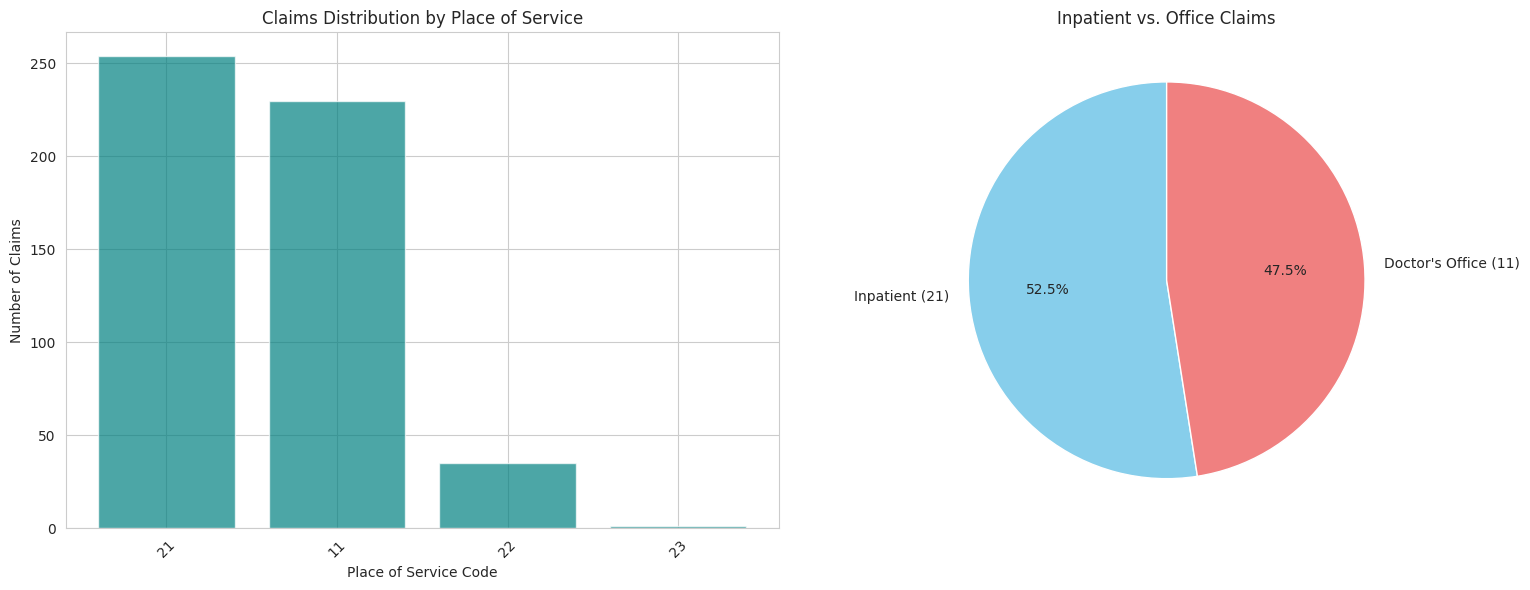

In [34]:
# ----------------------------------------------------------------------------
# QUESTION 5: Service Location Analysis
# ----------------------------------------------------------------------------
"""
Analyze where services are provided (Inpatient vs. Outpatient, etc.)
This helps understand the care setting distribution.
"""

print("\n" + "="*80)
print("QUESTION 5: SERVICE LOCATION ANALYSIS")
print("="*80)

# Count by place of service
pos_counts = df_line['PlaceOfService'].value_counts().reset_index()
pos_counts.columns = ['PlaceOfService', 'ClaimCount']
pos_counts['Percentage'] = (pos_counts['ClaimCount'] / pos_counts['ClaimCount'].sum() * 100).round(2)

print("\nClaims by Place of Service:")
print(pos_counts.to_string(index=False))

# Specific comparison: INPATIENT vs DOCTOR'S OFFICE
inpatient = pos_counts[pos_counts['PlaceOfService'] == 21]['ClaimCount'].sum()  # 21 = Inpatient Hospital
office = pos_counts[pos_counts['PlaceOfService'] == 11]['ClaimCount'].sum()     # 11 = Office

print(f"\n✓ Inpatient Hospital (POS=21): {inpatient:,} claims")
print(f"✓ Doctor's Office (POS=11): {office:,} claims")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# All places of service
ax1.bar(pos_counts['PlaceOfService'].astype(str), pos_counts['ClaimCount'], color='teal', alpha=0.7)
ax1.set_xlabel('Place of Service Code')
ax1.set_ylabel('Number of Claims')
ax1.set_title('Claims Distribution by Place of Service')
ax1.tick_params(axis='x', rotation=45)

# Inpatient vs Office comparison
comparison_data = pd.DataFrame({
    'Location': ['Inpatient (21)', "Doctor's Office (11)"],
    'Claims': [inpatient, office]
})
ax2.pie(comparison_data['Claims'], labels=comparison_data['Location'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
ax2.set_title('Inpatient vs. Office Claims')

plt.tight_layout()
plt.show()



QUESTION 6: CLAIMS WITH HIGH SERVICE LINE COUNTS (≥5 Lines)

Found 5 claims with ≥5 service lines

Top 20 claims by service line count:


,ProspectiveClaimId,BillingProvFirstName,TotalLines,TotalCharges
151,36794825,SB CHILDREN'S SERVICE,7,1163
79,36668119,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,1030
125,36740402,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,945
109,36710175,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873
135,36757684,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873


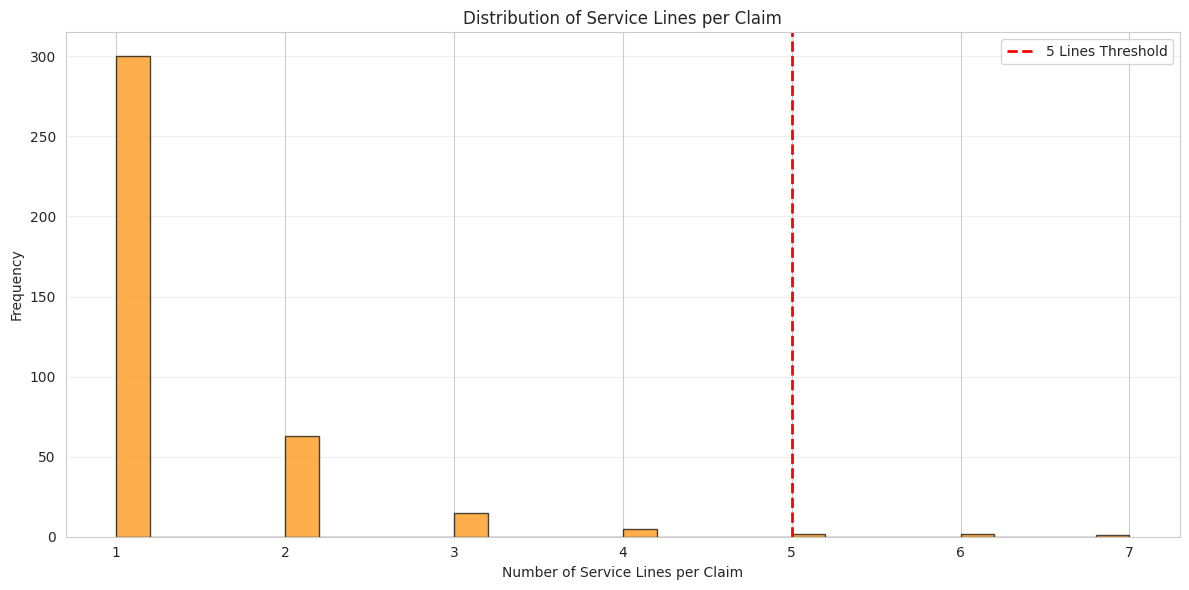

In [57]:
# ============================================================================
# PART 3: ADVANCED ANALYSIS WITH JOINS
# ============================================================================
# ----------------------------------------------------------------------------
# QUESTION 6: Claims with High Service Line Counts
# ----------------------------------------------------------------------------
"""
Merge HEADER and LINE files to identify claims with many service lines.
High line counts may indicate complex cases or potential billing issues.
"""
print("\n" + "="*80)
print("QUESTION 6: CLAIMS WITH HIGH SERVICE LINE COUNTS (≥5 Lines)")
print("="*80)

# Merge HEADER and LINE
merged_header_line = df_line.merge(df_header, on='ProspectiveClaimId', how='inner')

# Calculate service lines per claim
lines_per_claim_df = merged_header_line.groupby(['ProspectiveClaimId', 'BillingProvFirstName']).agg(
    TotalLines=('LinePos', 'count'),
    TotalCharges=('Charges', 'sum')
).reset_index()

# Filter for 5+ lines
high_line_claims = lines_per_claim_df[lines_per_claim_df['TotalLines'] >= 5].sort_values('TotalLines', ascending=False)

print(f"\nFound {len(high_line_claims)} claims with ≥5 service lines")
print("\nTop 20 claims by service line count:")
display(high_line_claims.head(20))

# Visualization
plt.figure(figsize=(12, 6))
plt.hist(lines_per_claim_df['TotalLines'], bins=30, color='darkorange', alpha=0.7, edgecolor='black')
plt.axvline(5, color='red', linestyle='--', linewidth=2, label='5 Lines Threshold')
plt.xlabel('Number of Service Lines per Claim')
plt.ylabel('Frequency')
plt.title('Distribution of Service Lines per Claim')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


QUESTION 7: DIAGNOSIS-PROCEDURE COMBINATIONS

Most common diagnosis codes associated with CPT 99291 (Critical Care):
DiagnosisCode  Frequency
       J96.01         53
        G93.5         34
        E78.5         33
        I61.9         26
        D64.9         25
          I10         24
        I60.8         24
        I95.9         20
      D72.829         19
      I67.848         17


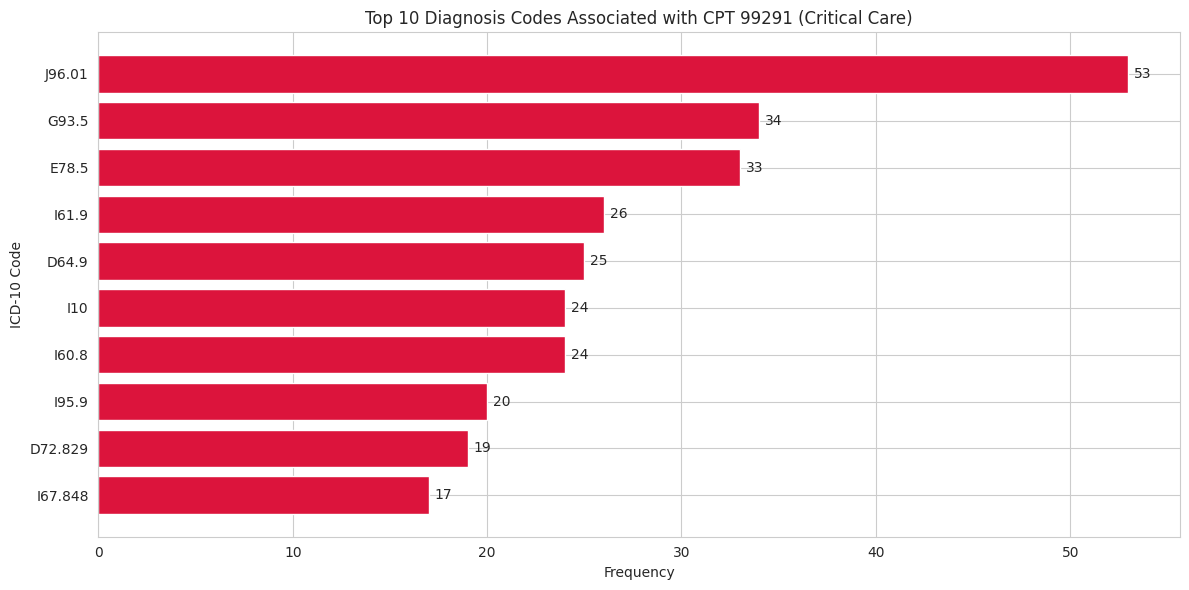

In [36]:
# ----------------------------------------------------------------------------
# QUESTION 7: Diagnosis-Procedure Combinations
# ----------------------------------------------------------------------------
"""
Merge all three files to analyze which diagnoses are associated with
specific procedures. We'll focus on CPT 99291 (Critical Care).
"""

print("\n" + "="*80)
print("QUESTION 7: DIAGNOSIS-PROCEDURE COMBINATIONS")
print("="*80)

# Merge all three files
merged_all = df_line.merge(df_code, on='ProspectiveClaimId', how='inner')

# Filter for CPT 99291 (Critical Care)
cpt_99291 = merged_all[merged_all['HCPCS'] == '99291']

# Count diagnosis codes associated with this procedure
diagnosis_with_99291 = cpt_99291['CodeValue'].value_counts().head(10).reset_index()
diagnosis_with_99291.columns = ['DiagnosisCode', 'Frequency']

print("\nMost common diagnosis codes associated with CPT 99291 (Critical Care):")
print(diagnosis_with_99291.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(diagnosis_with_99291['DiagnosisCode'], diagnosis_with_99291['Frequency'], color='crimson')
plt.xlabel('Frequency')
plt.ylabel('ICD-10 Code')
plt.title('Top 10 Diagnosis Codes Associated with CPT 99291 (Critical Care)')
plt.gca().invert_yaxis()
for i, v in enumerate(diagnosis_with_99291['Frequency']):
    plt.text(v + 0.3, i, str(v), va='center')
plt.tight_layout()
plt.show()


QUESTION 8: CHARGES BY PAYER

Top 10 Payers by Total Charges:


,PrimaryPayerName,TotalCharges,AvgChargesPerClaim,NumberOfClaims
17,MEDICARE,131008,$541.36,242
12,HEALTHFIRST FFS,29794,$647.70,46
9,FIDELIS/BETTER HEALTH PLAN,10810,$415.77,26
14,HIP MEDICAID,10014,$589.06,17
0,AETNA,6930,"$1,155.00",6
4,DIRECT SELF PAY,6575,"$1,095.83",6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,"$1,035.00",5
10,HEALTHFIRST CAPITATED,4905,$490.50,10
7,EMPIRE BLUE SR,4620,"$1,155.00",4
15,MAGNACARE,3465,"$1,155.00",3


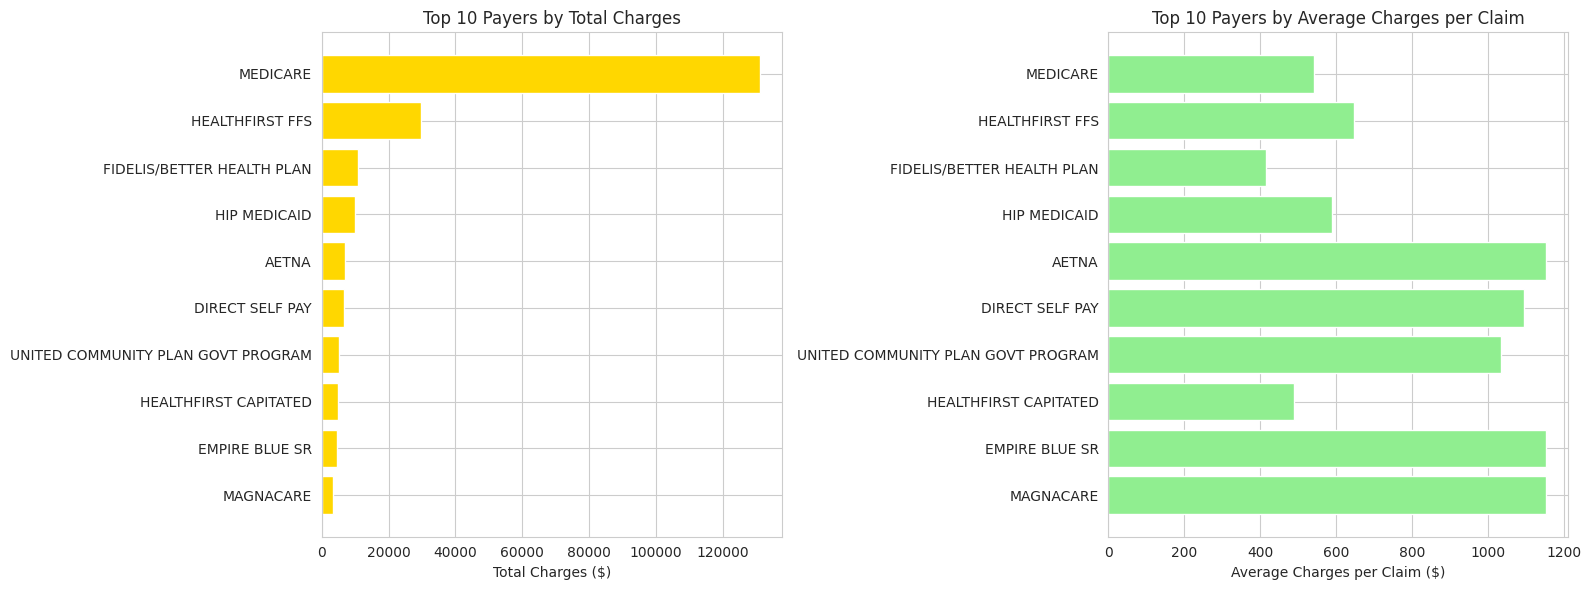

In [37]:
# ----------------------------------------------------------------------------
# QUESTION 8: Charges by Payer
# ----------------------------------------------------------------------------
"""
Analyze total and average charges by insurance payer.
This helps understand revenue streams and payer relationships.
"""

print("\n" + "="*80)
print("QUESTION 8: CHARGES BY PAYER")
print("="*80)

# Merge HEADER and LINE for charges analysis
header_line_merged = df_line.merge(df_header[['ProspectiveClaimId', 'PrimaryPayerName']],
                                     on='ProspectiveClaimId', how='inner')

# Calculate total charges per claim first
claim_charges = header_line_merged.groupby(['ProspectiveClaimId', 'PrimaryPayerName'])['Charges'].sum().reset_index()
claim_charges.columns = ['ProspectiveClaimId', 'PrimaryPayerName', 'TotalClaimCharges']

# Then aggregate by payer
payer_charges = claim_charges.groupby('PrimaryPayerName').agg(
    TotalCharges=('TotalClaimCharges', 'sum'),
    AvgChargesPerClaim=('TotalClaimCharges', 'mean'),
    NumberOfClaims=('ProspectiveClaimId', 'count')
).reset_index()

payer_charges = payer_charges.sort_values('TotalCharges', ascending=False)
top_10_payers = payer_charges.head(10)

print("\nTop 10 Payers by Total Charges:")
pd.set_option('display.float_format', '${:,.2f}'.format)
display(top_10_payers)
pd.reset_option('display.float_format')

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Total charges
ax1.barh(range(len(top_10_payers)), top_10_payers['TotalCharges'], color='gold')
ax1.set_yticks(range(len(top_10_payers)))
ax1.set_yticklabels(top_10_payers['PrimaryPayerName'])
ax1.set_xlabel('Total Charges ($)')
ax1.set_title('Top 10 Payers by Total Charges')
ax1.invert_yaxis()

# Average charges per claim
ax2.barh(range(len(top_10_payers)), top_10_payers['AvgChargesPerClaim'], color='lightgreen')
ax2.set_yticks(range(len(top_10_payers)))
ax2.set_yticklabels(top_10_payers['PrimaryPayerName'])
ax2.set_xlabel('Average Charges per Claim ($)')
ax2.set_title('Top 10 Payers by Average Charges per Claim')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()



QUESTION 9: PROVIDER COMPLEXITY ANALYSIS

Top Providers by Complexity:


,BillingProvFirstName,BillingProviderNPI,AvgComplexityScore,AvgDiagnosisCount,AvgServiceLines,AvgCharges,TotalClaims
0,NEW YORK SPINE AND BRAIN SURGERY,1154376309,41.331677,9.231884,1.028986,1152.898551,69
1,SB CHILDREN'S SERVICE,1083660575,25.937354,3.333333,2.777778,547.777778,9
3,SB INTERNISTS,1821035601,20.290326,3.592105,1.223684,576.052632,152
6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,1538114723,17.625295,2.125000,2.000000,369.475000,40
4,SB PSYCHIATRIC ASSOCIATES,1437105905,15.866772,1.805556,1.638889,529.583333,36
5,SB SURGICAL ASSOCIATES,1063468536,14.023835,2.049383,1.209877,376.382716,81


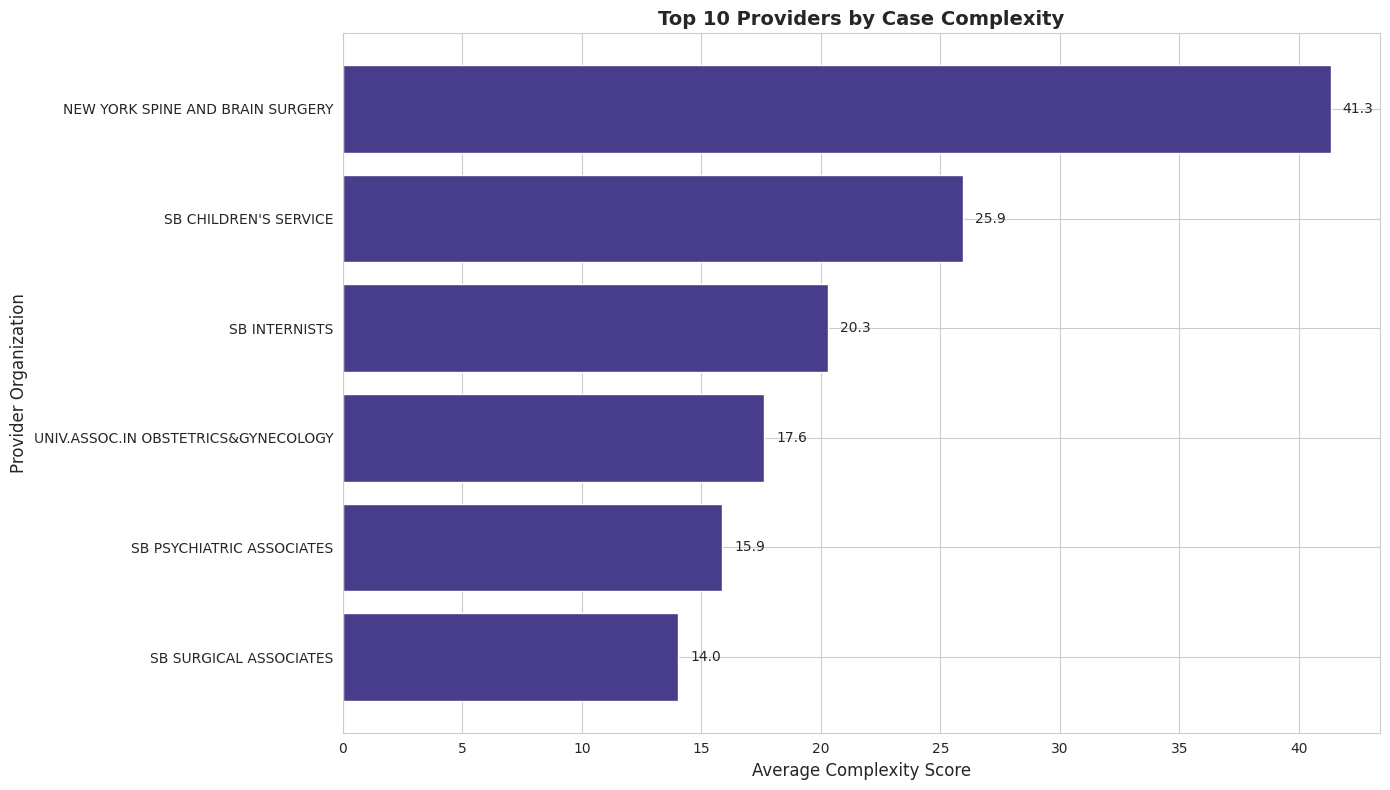

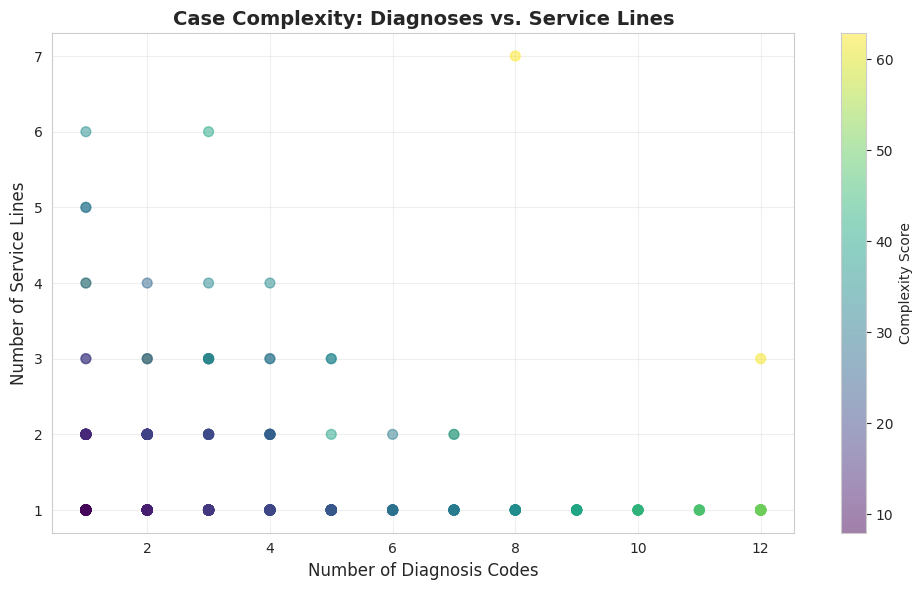


KEY INSIGHTS

Most complex provider: NEW YORK SPINE AND BRAIN SURGERY
NPI: 1154376309
Average complexity score: 41.33
Average diagnoses per claim: 9.23
Average service lines per claim: 1.03
Average charges: $1,152.90
Total claims analyzed: 69 claims

Interpretation:
- Providers with higher diagnosis counts and more lines tend to manage more chronic or complicated cases.
- This analysis helps identify specialists or hospitalists who work with complex patients.
- The scatter plot reveals a positive correlation between diagnosis codes and service lines, both contributing to overall complexity.



In [59]:
# ============================================================================
# PART 4: CREATIVE ANALYSIS
# ============================================================================
# QUESTION 9: PROVIDER COMPLEXITY ANALYSIS
# ============================================================================
"""
Custom Question:
Which billing providers handle the most complex cases?

Complexity Definition:
- More diagnosis codes = more complex
- More service lines = more complex
- Higher total charges = possibly more complex

We will:
1. Calculate diagnosis count per claim
2. Calculate service line count per claim
3. Calculate total charges per claim
4. Merge metrics with HEADER
5. Aggregate by provider
6. Rank providers by average complexity score
"""

print("\n" + "="*80)
print("QUESTION 9: PROVIDER COMPLEXITY ANALYSIS")
print("="*80)

# ---------------------------------------------
# STEP 1 — Calculate complexity pieces per claim
# ---------------------------------------------

# Diagnosis count
dx_count = (
    df_code.groupby("ProspectiveClaimId")
    .size()
    .reset_index(name="DiagnosisCount")
)

# Service line count
line_count = (
    df_line.groupby("ProspectiveClaimId")
    .size()
    .reset_index(name="ServiceLineCount")
)

# Total charges
charges = (
    df_line.groupby("ProspectiveClaimId")["Charges"]
    .sum()
    .reset_index(name="TotalCharges")
)

# ---------------------------------------------
# STEP 2 — Merge into a single claim-level file
# ---------------------------------------------
# USE BillingProvFirstName (which contains the organization name)
claim_complexity = (
    df_header[["ProspectiveClaimId", "BillingProviderNPI", "BillingProvFirstName"]]
    .merge(dx_count, on="ProspectiveClaimId", how="left")
    .merge(line_count, on="ProspectiveClaimId", how="left")
    .merge(charges, on="ProspectiveClaimId", how="left")
)

# Replace missing values (0 diagnosis or no service lines)
claim_complexity = claim_complexity.fillna({
    "DiagnosisCount": 0,
    "ServiceLineCount": 0,
    "TotalCharges": 0
})

# Remove claims with no provider name
claim_complexity = claim_complexity[claim_complexity["BillingProvFirstName"].notna()]

# ---------------------------------------------
# STEP 3 — Build a simple complexity score
# ---------------------------------------------
max_dx = claim_complexity["DiagnosisCount"].max()
max_lines = claim_complexity["ServiceLineCount"].max()
max_charges = claim_complexity["TotalCharges"].max()

# Avoid divide-by-zero if dataset is small
if max_dx == 0: max_dx = 1
if max_lines == 0: max_lines = 1
if max_charges == 0: max_charges = 1

claim_complexity["ComplexityScore"] = (
    (claim_complexity["DiagnosisCount"] / max_dx * 0.4) +
    (claim_complexity["ServiceLineCount"] / max_lines * 0.3) +
    (claim_complexity["TotalCharges"] / max_charges * 0.3)
) * 100

# ---------------------------------------------
# STEP 4 — Aggregate to the provider level
# ---------------------------------------------
provider_complexity = (
    claim_complexity.groupby(["BillingProvFirstName", "BillingProviderNPI"])
    .agg(
        AvgComplexityScore=("ComplexityScore", "mean"),
        AvgDiagnosisCount=("DiagnosisCount", "mean"),
        AvgServiceLines=("ServiceLineCount", "mean"),
        AvgCharges=("TotalCharges", "mean"),
        TotalClaims=("ProspectiveClaimId", "count")
    )
    .reset_index()
)

# Optional: require at least 5 claims per provider
provider_complexity = provider_complexity[provider_complexity["TotalClaims"] >= 5]

provider_complexity = provider_complexity.sort_values(
    "AvgComplexityScore", ascending=False
)

print("\nTop Providers by Complexity:")
display(provider_complexity.head(10))

# ---------------------------------------------
# VISUALIZATION 1 — Top 10 providers by complexity
# ---------------------------------------------
if len(provider_complexity) > 0:
    top10 = provider_complexity.head(10)

    plt.figure(figsize=(14, 8))
    plt.barh(top10["BillingProvFirstName"], top10["AvgComplexityScore"], color='darkslateblue')
    plt.xlabel("Average Complexity Score", fontsize=12)
    plt.ylabel("Provider Organization", fontsize=12)
    plt.title("Top 10 Providers by Case Complexity", fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    # Add value labels
    for i, v in enumerate(top10["AvgComplexityScore"]):
        plt.text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("No provider meets minimum claim count for visualization.")

# ---------------------------------------------
# VISUALIZATION 2 — Diagnoses vs Service Lines
# ---------------------------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(claim_complexity['DiagnosisCount'],
                     claim_complexity['ServiceLineCount'],
                     alpha=0.5, c=claim_complexity['ComplexityScore'],
                     cmap='viridis', s=50)
plt.xlabel('Number of Diagnosis Codes', fontsize=12)
plt.ylabel('Number of Service Lines', fontsize=12)
plt.title('Case Complexity: Diagnoses vs. Service Lines', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.colorbar(scatter, label='Complexity Score')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# INTERPRETATION SUMMARY
# ---------------------------------------------
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)

if len(provider_complexity) > 0:
    best = provider_complexity.iloc[0]

    print(f"""
Most complex provider: {best['BillingProvFirstName']}
NPI: {best['BillingProviderNPI']}
Average complexity score: {best['AvgComplexityScore']:.2f}
Average diagnoses per claim: {best['AvgDiagnosisCount']:.2f}
Average service lines per claim: {best['AvgServiceLines']:.2f}
Average charges: ${best['AvgCharges']:,.2f}
Total claims analyzed: {int(best['TotalClaims'])} claims

Interpretation:
- Providers with higher diagnosis counts and more lines tend to manage more chronic or complicated cases.
- This analysis helps identify specialists or hospitalists who work with complex patients.
- The scatter plot reveals a positive correlation between diagnosis codes and service lines, both contributing to overall complexity.
""")
else:
    print("Dataset too small — no provider has enough claims for valid comparison.")